In [344]:
import random
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')
random.seed('Izan Beltran Ferreiro')

In [359]:
def drop_random_ball(n: int):
    """Generate the final position of a random ball drop in a galton board.

    Args:
        n: The height of the galton box.

    Returns:
        The final x position of the ball.
    """
    i = 0
    for _ in range(n):
        if random.random() <= 1.0/2:
            i += 1
    return i

In [360]:
def sample_galtonbox_distribution(N: int, n: int):
    """Get N ball drops in a galton board of size n

    Args:
        N: The number of balls to drop
        n: The height of the galton box

    Returns:
        The final x positions of the N balls.
    """
    return [drop_random_ball(n) for _ in range(N)]

In [361]:
n = 10
N = 1000

In [362]:
positions = sample_galtonbox_distribution(N, n)

In [363]:
frequencies = {key: 0 for key in range(n+1)}
for p in positions:
    frequencies[p] += 1

In [366]:
expected_number_of_balls = {k: N*math.comb(n, k)*(1/2)**n for k in frequencies.keys()}

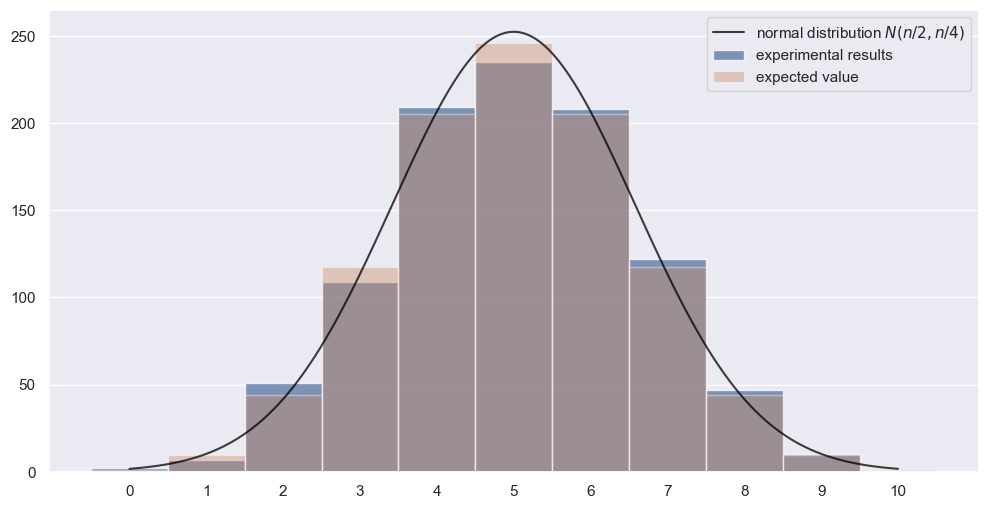

In [367]:
fig, ax = plt.subplots(figsize=(12,6))
ax1.set(xlabel='ball position', ylabel='number of balls')
sns.barplot(x=frequencies.keys(), y=frequencies.values(), width=1, ax=ax, alpha=0.75, label='experimental results')
x = np.linspace(0, n, 300)
y = scipy.stats.norm.pdf(x, loc=n/2, scale=math.sqrt(n/4)) * N
sns.barplot(x=frequencies.keys(), y=expected_number_of_balls.values(), width=1, ax=ax, alpha=0.4, label='expected value')
sns.lineplot(x=x, y=y, ax=ax, color='black', alpha=0.75, label='normal distribution $N(n/2, n/4)$')
# sns.lineplot(x=x, y=y, ax=ax, color='black', alpha=0.75, label='expected number of balls')
plt.show()